<a href="https://colab.research.google.com/github/sr606/Python-Practice/blob/main/Aerofit_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Defining Problem Statement and Analysing basic metrics**


###**About Aerofit**

Aerofit is a leading brand in the field of fitness quipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater the needs of all categories of people.

###**Business Problem**

The market research team at AeroFit wants identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

##**Imposrting Libraries**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation library
import seaborn as sns #data visualisation librabry based on matplotlib
from scipy import stats
from scipy.stats import norm


##**Importing the dataset**

In [3]:
! gdown 1jyIrDhgS-OKwby2mctMIGOFyrXG2VMec

Downloading...
From: https://drive.google.com/uc?id=1jyIrDhgS-OKwby2mctMIGOFyrXG2VMec
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 20.9MB/s]


In [4]:
df=pd.read_csv('/content/aerofit_treadmill.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


##**Baisc Analysis**

###**Shape of the data**

In [5]:
df.shape

(180, 9)

###**Columns in DataFrame**

In [6]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

####**First 5 rows**

In [7]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


###**Data Type of all attributes(columns)**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


####**Analysis**



1.   There is no missing values in dataframe
2.   Most of the columns are numeric except Product, Gender and Marital Status



###**Statistical Summary**
####**Statastical Summary of Numeric Columns**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


####**Statistical Summary of Object Columns**

In [10]:
df.describe(include = 'object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


Here we can see most of the users are using **KP281** machine and its frequency or count is 80 out of 180 total counts

And the product is mostly has most of the users from male category


##**Non-Graphical Analysis: Value counts and unique attributes**

###**Product Column**


####**Unique**

In [11]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

Aerofit produces three treadmill models: KP281,KP481, and KP781

####**value counts**

In [12]:
Product_counts = df['Product'].value_counts(normalize = True)*100
Product_counts

,proportion
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


**Insight:**

Among the users, 44.44% prefer using KP281 Treadmill, while 33.33% users prefer KP481 treadmill, and only 22.22% people favor the KP871 treadmill.

####**Age Column**

**Unique**

In [13]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [14]:
df['Age'].nunique()

32

**Value Counts**

In [15]:
age_count = df['Age'].value_counts(normalize = True)*100
age_count.round(2)

,proportion
Age,
25,13.89
23,10.00
24,6.67
26,6.67
28,5.00
35,4.44
33,4.44
30,3.89
38,3.89


In [16]:
age_count[(age_count.index>=20)&(age_count.index<=30)].sum().round(2)

63.89

**Insight**

Approximately 64% of Aerofit Treadmill users belong to age group of 20-30.

####**Gender Column**

**Unique**

In [17]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

**Value Counts**

In [18]:
gender_count=df['Gender'].value_counts(normalize = True)*100
gender_count

,proportion
Gender,
Male,57.777778
Female,42.222222


**Insight**

Aerofit has 57.78 male cistomers and 42.22% female customers.

####**Marital Status**

**Unique**

In [19]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

**Value counts**

In [20]:
df['MaritalStatus'].value_counts(normalize = True)*100

,proportion
MaritalStatus,
Partnered,59.444444
Single,40.555556


**Insight**

59.44% people are married, where remaining 40.56% are single.

##**Data Preprocessing**

###**Handling Missing Values**

In [21]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


**Inference**

There are no missing values in dataset.

###**Handling Outliers**

####**Income column**

In [22]:
df['Income'].describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


To find outliers inincome column we need to use boxplot here. But before using the boxplot we need to find these 5 points:



1.   q3 - upper quartile
2.   q1 - lower quartile
3.   Median
4.   Upper bound
5.   Lower bound



In [23]:
q1 = np.percentile(df['Income'],25)
q3 = np.percentile(df['Income'],75)
print('q1 =', q1)
print('q2 =', q3)

q1 = 44058.75
q2 = 58668.0


####**Analysis:**

In [24]:
# to fond upper bound and lower bound need to find IQR(inter quartile range)
IQR = q3 - q1
IQR

14609.25

####**Analysis:**


IQR = 14609.25

In [25]:
upper_bound = q3 + 1.5*IQR
lower_bound = q1 - 1.5*IQR
print('upper bound = ', upper_bound)
print('lower bound =', lower_bound)
print('Median=', df['Income'].median())

upper bound =  80581.875
lower bound = 22144.875
Median= 50596.5


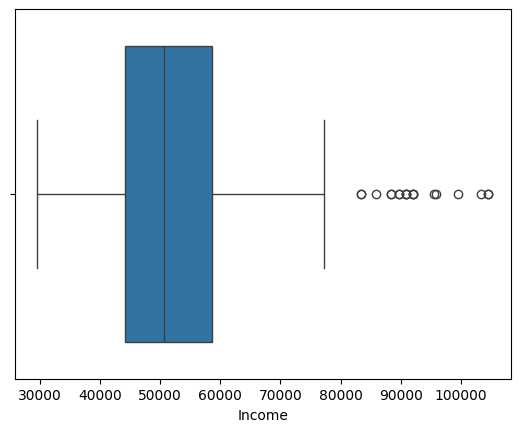

In [26]:
sns.boxplot(data = df, x= 'Income')
plt.show()



*   As we see there are outliers in the 'Income' column.
*   all values > 80581.75(upper bound) are outliers in the 'Income' column



In [27]:
(len(df.loc[df['Income']>upper_bound])/len(df))*100

10.555555555555555

**Analysis**

10.5% values in Income column are outliers but we choose not to drop them as these values may required to draw some valuable insights and it may be useful for customer profiling.

####**Miles Column**

Like 'Income' we can perform same steps to find outliers in 'Miles' column

In [28]:
df['Miles'].describe()

,Miles
count,180.000000
mean,103.194444
std,51.863605
min,21.000000
25%,66.000000
50%,94.000000
75%,114.750000
max,360.000000


In [29]:
q1 = np.percentile(df['Miles'],25)
q3 = np.percentile(df['Miles'],75)
IQR = q3 -q1
upper_bound = q3 + 1.5*IQR
lower_bound = q1 - 1.5*IQR
print('IQR =', IQR)
print('upper bound =', upper_bound)
print('lower bound =', lower_bound)
print('Median = ', df['Miles'].median())


IQR = 48.75
upper bound = 187.875
lower bound = -7.125
Median =  94.0


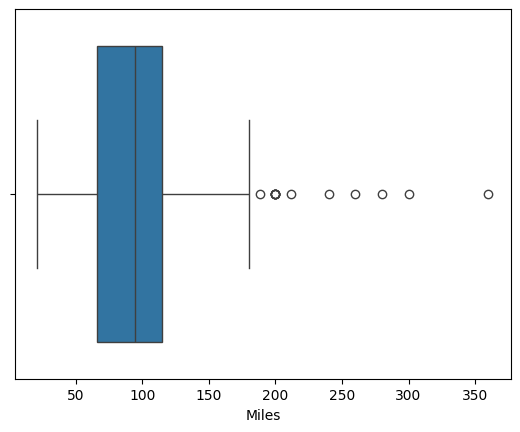

In [30]:
sns.boxplot(data = df, x = 'Miles')
plt.show()



*   As we see there are outliers in miles column

*  all values > 187.875(upper bound) are outliers in 'Miles' column



In [31]:
(len(df.loc[df['Miles'] > upper_bound])/len(df))* 100

7.222222222222221

**Analysis**

7.22% values in 'Miles column are outliers but we choose not to drop them as these values may required to draw soem valuable insights and it may be useful for customer profiling.

###**Adding New columns - Income group and Age group**

####**Age Group**

To gain valuable insights, it is essential to group age column in distinct groups, such as young, middle-age, and old. It will allow us to understand customer purchase behaviour.

In [32]:
df['Age'].describe()

,Age
count,180.000000
mean,28.788889
std,6.943498
min,18.000000
25%,24.000000
50%,26.000000
75%,33.000000
max,50.000000


In [33]:
df['Age group'] = pd.cut(df['Age'], bins = [17,29,39,50], labels = ['Young', 'Middle-aged', 'Old'])

In [34]:
df['Age group'].value_counts()

,count
Age group,
Young,113
Middle-aged,50
Old,17


Similarly, we can categarizr 'Income values in 3 groups 'Low', 'Medium', 'High'. It will not only allow us to gain valuable insight but also help in customer profiling.

In [35]:
df['Income'].describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


In [38]:
df['Income Group'] = pd.cut(df['Income'], bins = [29000,50000,75000,105000], labels = ['low','Medium','High'])

In [39]:
df['Income Group'].value_counts()

,count
Income Group,
low,83
Medium,76
High,21


In [40]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age group,Income Group
0,KP281,18,Male,14,Single,3,4,29562,112,Young,low
1,KP281,19,Male,15,Single,2,3,31836,75,Young,low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,low
3,KP281,19,Male,12,Single,3,3,32973,85,Young,low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,low


##**Univariate Analysis**

###**Categorical Columns**

####**Distribution of Treadmmills among Aerofit customers**

<ipython-input-41-920e9ab47000>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = df['Product'], palette= 'pastel')


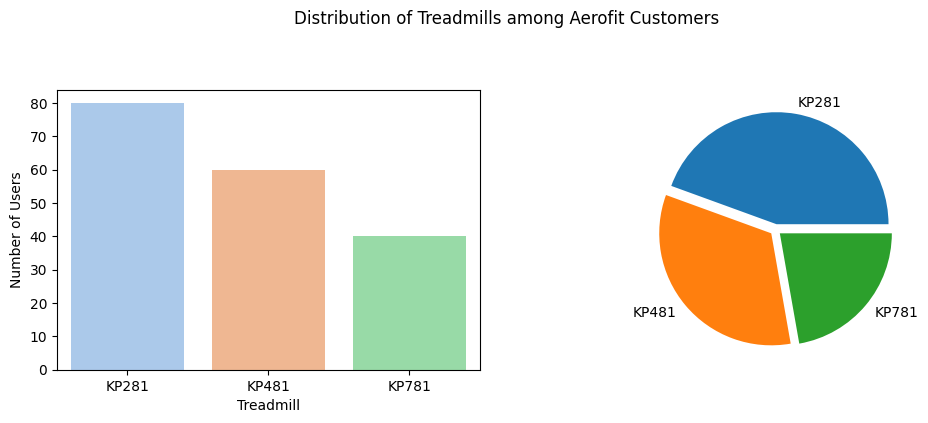

In [41]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(data = df, x = df['Product'], palette= 'pastel')
plt.xlabel('Treadmill')
plt.ylabel('Number of Users')
plt.subplot(2,2,2)
plt.pie(df['Product'].value_counts(), labels = df['Product'].unique(), explode = (0.05,0.05, 0.05))
plt.suptitle('Distribution of Treadmills among Aerofit Customers')
plt.show()


**Insight**

**Recommendations:**